# Example Visualization with SOMs

### Imports

In [1]:
import seaborn.objects as so
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbgsom import DBGSOM
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.pipeline import Pipeline


## load data

In [2]:
digits, target = load_digits(return_X_y=True)
fashion_mnist = pd.read_csv(
    "F:\\Dokumente\\git\\fashion_mnist\\fashion-mnist_train.csv"
)

fashion_mnist_target = fashion_mnist.label
fashion_mnist_train = fashion_mnist.drop("label", axis=1)

### Defining and fitting the som

In [3]:
som = DBGSOM(
    # max_neurons=100,
    sf=0.2,
    n_epochs_max=50,
    random_state=42,
    metric="cosine",
    max_neurons=200,
    # nn_method="pynndescent"
)
scaler = StandardScaler()
pipe = Pipeline([("scaler", scaler), ("som", som)])
pipe.fit(digits)


 80%|████████  | 40/50 [00:01<00:00, 36.00 epochs/s]


Pipeline(steps=[('scaler', StandardScaler()),
                ('som',
                 DBGSOM(max_neurons=200, metric='cosine', n_epochs_max=50,
                        random_state=42, sf=0.2))])

### Plotting results

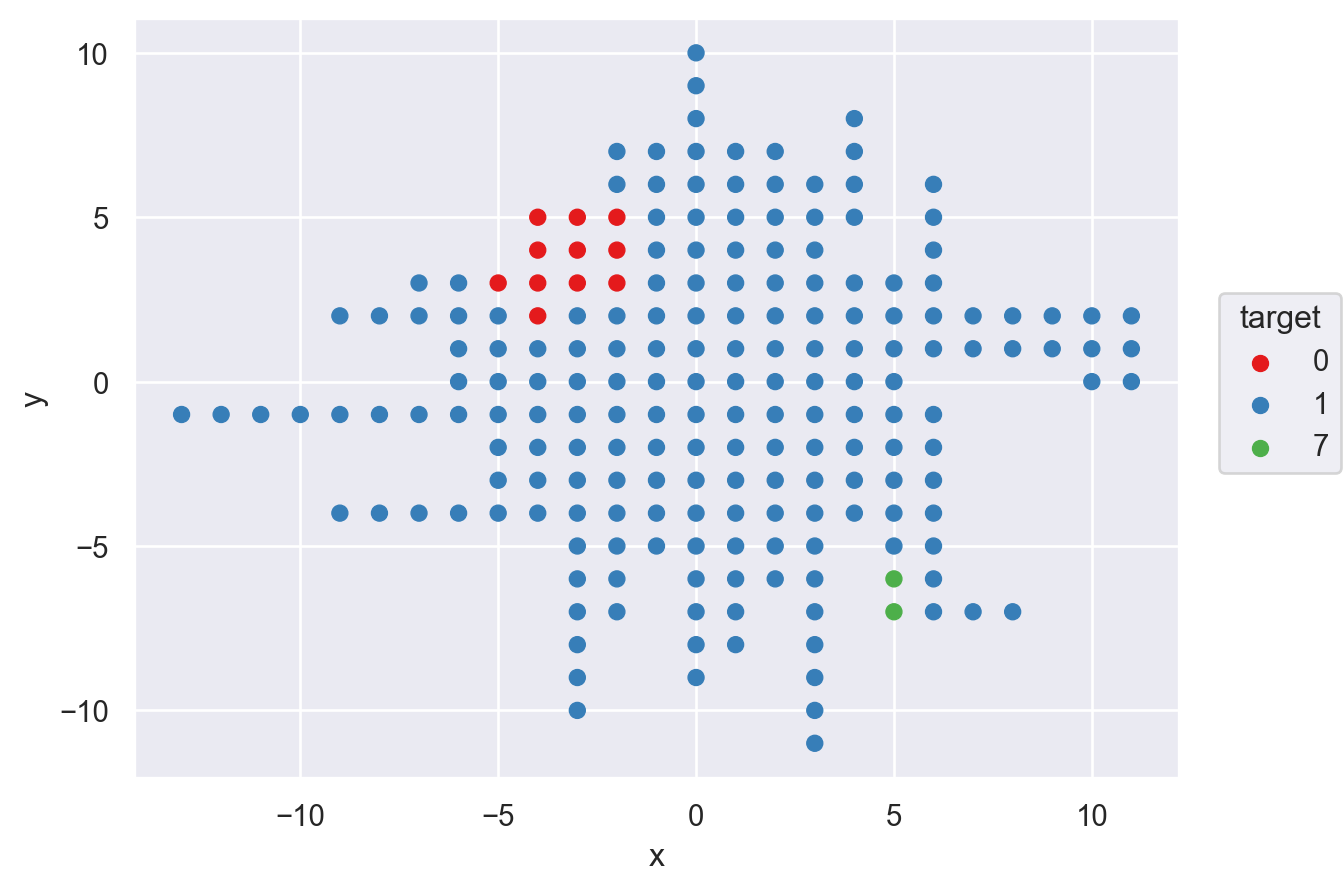

In [4]:
weights = pipe.named_steps["som"].weights_
nn, distances = pairwise_distances_argmin_min(weights, digits)
edges = list(pipe.named_steps["som"].som_.edges)
weights = som.weights_
dots = pd.DataFrame(np.array(pipe.named_steps["som"].neurons_), columns=["x", "y"])
dots["epoch_created"] = list(dict(pipe.named_steps["som"].som_.nodes.data("epoch_created")).values())
dots["error"] = list(dict(pipe.named_steps["som"].som_.nodes.data("error")).values())
dots["target"] = target[nn]
so.Plot(dots, x="x", y="y", color="target").add(so.Dot()).scale(color="Set1")


In [5]:
som2 = DBGSOM(
    max_neurons=100,
    sf=0.1,
    n_epochs_max=50,
    random_state=42,
    metric="cosine"
    # nn_method="pynndescent"

)
som2.fit(data)


NameError: name 'data' is not defined

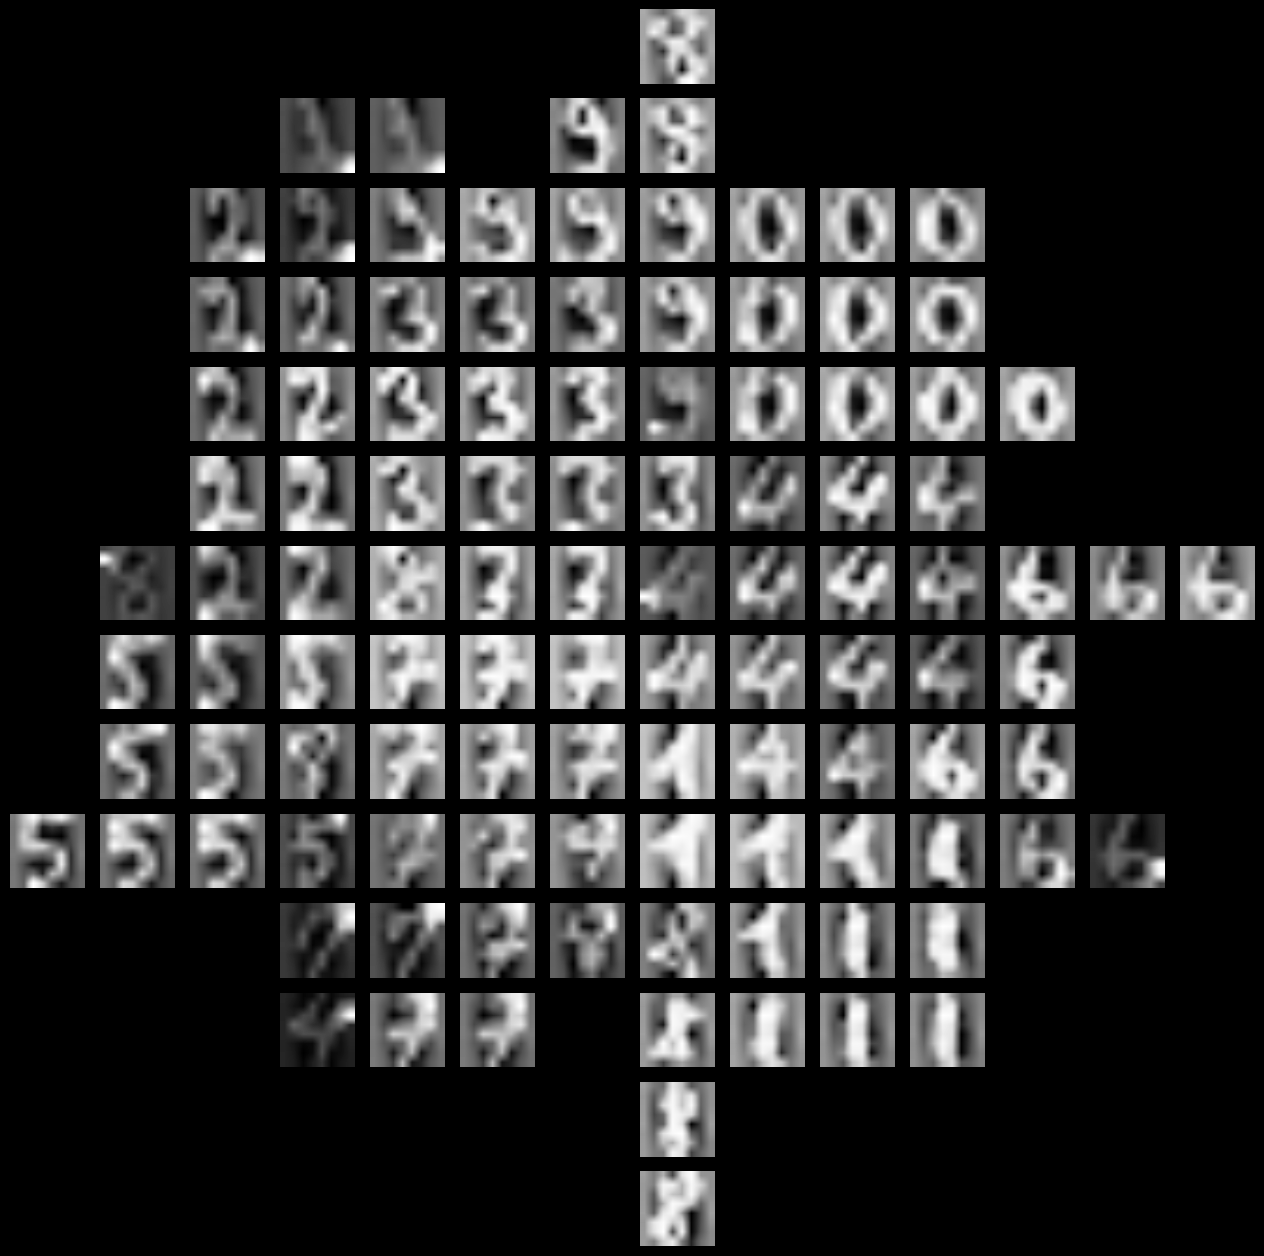

In [ ]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(30, 30))

min, max = (np.array(som2.neurons_).min(), np.array(som2.neurons_).max())
nn, distances = pairwise_distances_argmin_min(som2.weights_, data)

dim = abs(max-min)
gs = GridSpec(2*dim, 2*dim)
for index, neuron in enumerate(som2.neurons_):
    neuron += dim
    plt.subplot(gs[neuron[0], neuron[1]])
    plt.imshow(data_draw[nn[index]].reshape(8, 8), cmap="Greys_r", interpolation="bilinear")
    plt.axis('off')

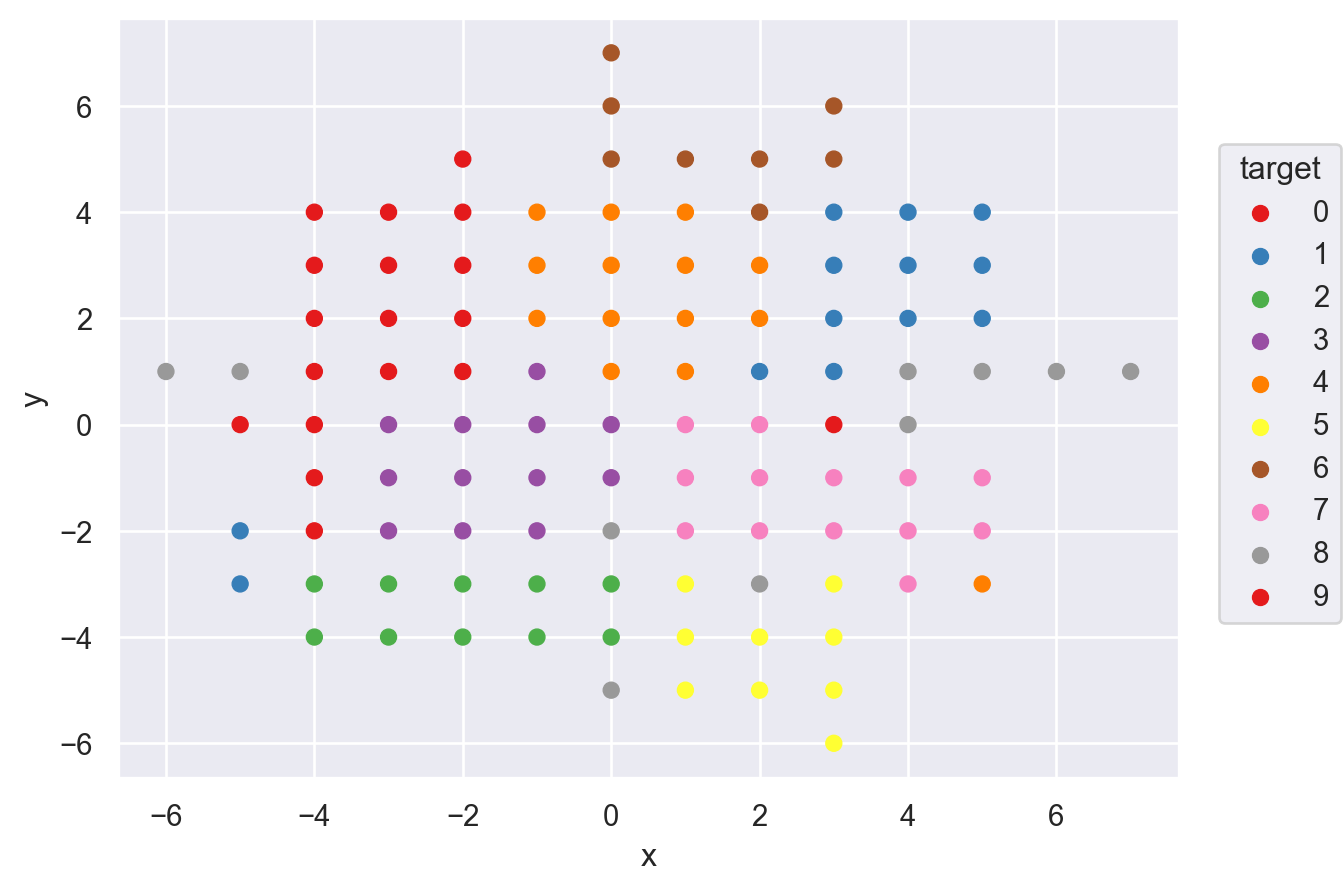

In [ ]:
nn, distances = pairwise_distances_argmin_min(som2.weights_, digits)
edges = list(som2.som_.edges)
weights = som2.weights_
dots = pd.DataFrame(np.array(som2.neurons_), columns=["x", "y"])
dots["epoch_created"] = list(dict(som2.som_.nodes.data("epoch_created")).values())
dots["error"] = list(dict(som2.som_.nodes.data("epoch_created")).values())
dots["target"] = target[nn]
so.Plot(dots, x="x", y="y", color="target").add(so.Dot()).scale(color="Set1")
